<a href="https://colab.research.google.com/github/Carmen-N/An-lisis-del-mercado-de-los-videojuegos/blob/master/video_games_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análisis del mercado de los videojuegos**


Objetivo:

Para una tienda online de juegos de ordenador, es necesario realizar un análisis de mercado, identificar los perfiles que determinan el éxito de los juegos, definir un retrato de usuario para cada una de las regiones y poner a prueba las hipótesis de trabajo. Esto permitirá apostar por un producto potencialmente popular y planificar campañas publicitarias que ayuden a desarrollar el negocio de la tienda.

Los datos se recogen de fuentes abiertas y se guardan en el archivo games.csv. Los datos incluyen información de 1983 a 2016. Es posible que los datos de 2016 no estén completos.

Descripción de los datos games.csv:

Nombre - nombre del juego

* Plataforma 



* Year_of_Release - año de publicación

* Género - género del juego


* NA_sales - Ventas en Norteamérica (millones de dólares)
* EU_sales - Ventas en Europa (millones de dólares


* JP_sales - Ventas en Japón (millones de dólares)

* Otras_ventas - ventas en otros países (millones de dólares)

* Critic_Score - puntuación de los críticos (de 0 a 100)
* Puntuación_usuario - valoración del usuario (de 0 a 10)  


* Clasificación - Clasificación proporcionada por la ESRB (Entertainment Software Rating Board). Esta asociación determina la clasificación de los juegos de ordenador y los asigna a la categoría de edad adecuada.  







**Las etapas de la ejecución de un proyecto**

1. Obtener los  datos
2. Preprocesamiento de datos
3. Análisis exploratorio de datos
4. Perfil de usuario de cada región
5. Encuesta sobre indicadores estadísticos
6. Comprobación de hipótesis
7. Resultados del estudio

Paso 1: Obtener los datos

Examine los datos aportados para el proyecto.

In [167]:
#importar librerias 
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

Leer el archivo games.csv y almacenarlo en la variable df.

In [6]:
data = files.upload()

Saving Video Games Dataset.csv to Video Games Dataset.csv


In [7]:
df = pd.read_csv(io.StringIO(data['Video Games Dataset.csv'].decode('utf-8')))

In [99]:

# Obtener las 10 primeras filas de la tabla.
df.head(10)

,rank,name,platform,year,genre,publisher,northamerica_sales,eurpeanunion_sales,japan_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,NaN,12.88,3.79,NaN,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,NaN,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,NaN
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,NaN,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,NaN,0.28,0.47,28.31


Información general sobre los datos de la tabla df.

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rank                199 non-null    int64  
 1   name                199 non-null    object 
 2   platform            199 non-null    object 
 3   year                199 non-null    int64  
 4   genre               199 non-null    object 
 5   publisher           198 non-null    object 
 6   northamerica_sales  185 non-null    float64
 7   eurpeanunion_sales  190 non-null    float64
 8   japan_sales         189 non-null    float64
 9   other_sales         192 non-null    float64
 10  global_sales        187 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 17.2+ KB


Veamos más de cerca la información obtenida.

Hay un total de 11 columnas en la tabla. Hay dos tipos de datos: objeto no nulo (5 columnas) y float64 no nulo (6 columnas).

Resultados

Cada fila de la tabla contiene datos históricos sobre ventas de juegos, valoraciones de usuarios y expertos, géneros y plataformas (por ejemplo, Xbox o PlayStation), año de lanzamiento y clasificación por edades asignada.

Dos problemas que hay que resolver en la próxima fase: las omisiones y los nombres poco acertados de las columnas.

Las columnas Género, Plataforma, Año_de_estreno y desglose de ventas por regiones son especialmente valiosas para comprobar hipótesis de trabajo. Podemos utilizarlos para rastrear cómo han cambiado las preferencias de los usuarios a lo largo del tiempo, para construir un perfil de usuario para cada región. Las columnas Critic_Score, User_Score, Rating nos ayudarán a probar hipótesis sobre el efecto de las puntuaciones de los juegos en las ventas en función del género y la plataforma del juego.

Paso 2: Procesamiento previo de los datos

Cambie los nombres de las columnas, convierta los datos al tipo correcto, procese las lagunas (rellenándolas cuando sea posible), compruebe si hay datos duplicados y calcule las ventas totales en todas las regiones y anótelas en una columna aparte.

Obtenemos una lista de nombres de columnas.

In [11]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'NorthAmerica_Sales', 'EurpeanUnion_Sales', 'Japan_Sales',
       'Other_Sales', 'Global_Sales'],
      dtype='object')

Los nombres de las columnas están en mayúsculas, lo que no resulta muy cómodo para acceder a los datos. Vamos a cambiar el nombre de las columnas para facilitar la consulta. 
Comprobemos el resultado.

In [12]:
df = df.rename(columns=lambda x: x.lower())

In [13]:
df.columns

Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher',
       'northamerica_sales', 'eurpeanunion_sales', 'japan_sales',
       'other_sales', 'global_sales'],
      dtype='object')

Es necesario determinar si hay duplicados. 
Si los encuentra, elimínelos y compruebe que se han eliminado todos.

In [15]:
# obtener el número total de duplicados en la tabla df
df.duplicated() .sum()

0

No se han encontrado duplicados. Tratemos los valores que faltan.

Comprobar si faltan valores en los datos llamando a un conjunto de métodos para sumar los valores que faltan.

In [95]:
df.isna() .sum()

rank                   0
name                   0
platform               0
year                   0
genre                  0
publisher              1
northamerica_sales    14
eurpeanunion_sales     9
japan_sales           10
other_sales            7
global_sales          12
dtype: int64

Tratamiento de las omisiones en la columna "nombre

En primer lugar, veamos las filas con lagunas de datos en la columna del nombre.

In [90]:
# seleccionar las filas con datos que faltan en la columna nombre


df[df.isna().any(axis=1)]

,rank,name,platform,year,genre,publisher,northamerica_sales,eurpeanunion_sales,japan_sales,other_sales,global_sales
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,NaN,12.88,3.79,NaN,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,NaN,2.96,33.00
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,NaN
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,NaN,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,NaN,0.28,0.47,28.31
12,13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,NaN,6.18,7.20,0.71,23.10
13,14,Wii Fit,Wii,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,NaN
15,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,NaN
17,19,Super Mario World,SNES,1990,Platform,Nintendo,12.78,NaN,3.54,0.55,20.61
18,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4.75,9.26,NaN,2.05,20.22


Sólo hay dos filas de este tipo. Además, estas líneas contienen omisiones en otras columnas (genre, critic_score, user_score, rating) y se refieren a los juegos lanzados en 1993 en la plataforma GEN. 
Así que, consideraremos que estas líneas son irrelevantes y no pueden afectar a los resultados del análisis, por lo que las suprimiremos.

 eliminar las filas en las que faltan datos en la columna nombre 
 
 restablecer los índices

In [92]:
df = df.dropna(subset=['name']).reset_index(drop=True)

In [55]:
# comprueba el número total de vacíos en la tabla df
df.isnull().sum()

rank                   0
name                   0
platform               0
year                   0
genre                  0
publisher              1
northamerica_sales    14
eurpeanunion_sales     9
japan_sales           10
other_sales            7
global_sales          12
dtype: int64

In [67]:
df[df['year'].isna()]

,rank,name,platform,year,genre,publisher,northamerica_sales,eurpeanunion_sales,japan_sales,other_sales,global_sales


In [96]:
df['genre'].value_counts()

Action          37
Shooter         34
Platform        30
Role-Playing    28
Sports          15
Racing          14
Misc            13
Fighting         8
Puzzle           7
Simulation       7
Adventure        3
Strategy         3
Name: genre, dtype: int64

In [97]:
unique=df['genre'].sort_values()
unique.unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

**Paso 4:Análisis exploratorio de datos**

vamos a conoscer las evoluciónes de las ventas de juegos a lo largo de los años 

In [102]:
year=df['year'].value_counts()
year.head(20)

2010    19
2009    16
2007    16
2011    14
2008    13
2014    12
1999    12
2012    11
2006     8
2013     8
1998     7
2005     7
1996     7
1997     6
2004     5
2001     5
2015     5
1992     5
2000     3
1989     3
Name: year, dtype: int64

In [103]:
year=pd.DataFrame(year)
year.rename(columns={"year":"Game_Sales_Count"},inplace=True)

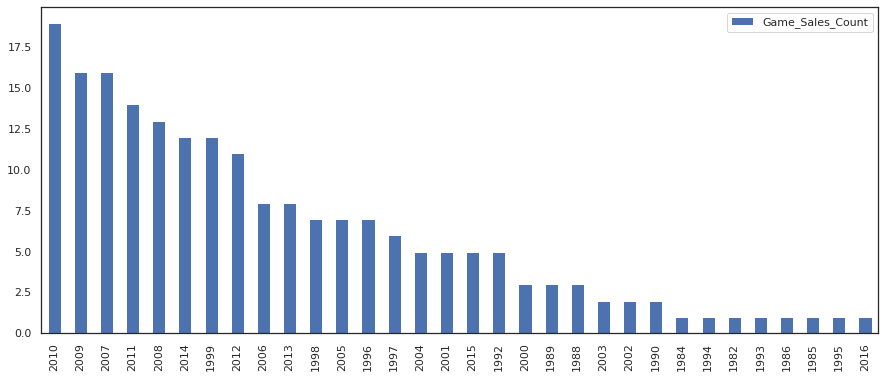

In [104]:
year.plot(figsize=(15,6),kind='bar')

Come nos muestra los datos, en los primeros años de 1980 a 2000 las ventas fueron aumentos, pero en pequeño espacio, pero después de que el siglo 21 (2008 y 2009 son más altos) los juegos de venta sustancialmente y ahora años (2015 a 2020) los juegos son las ventas menos.

***Veamos qué país ha vendido más juegos en el conjunto de datos dado.***

In [118]:
import plotly.express as px

In [128]:
# Sales in North America 
na=df['northamerica_sales'].sum()
print("NA Sales : ",na)

# Sales in European Union
eu=df['eurpeanunion_sales'].sum()
print("EU Sales : ",eu)

# Sales in Japan
jp=df['japan_sales'].sum()
print("JP Sales : ",jp)

# Other Sales 
other=df['other_sales'].sum()
print("other Sales : ",other)

# Global Sales 
glob=df['global_sales'].sum()
print("global Sales : ",glob)

NA Sales :  869.72
EU Sales :  578.8100000000001
JP Sales :  253.67000000000002
other Sales :  156.19
global Sales :  1844.13


In [129]:
dic={"Sales_From": ["Global","North America","European Union","Japan","Others"],
    "Sales": [1844.13 ,869.72 ,578.8100000000001,253.67000000000002 ,156.19]}

In [130]:
buy=pd.DataFrame(dic)
buy

,Sales_From,Sales
0,Global,1844.13
1,North America,869.72
2,European Union,578.81
3,Japan,253.67
4,Others,156.19


 el país con más ventas de juegos

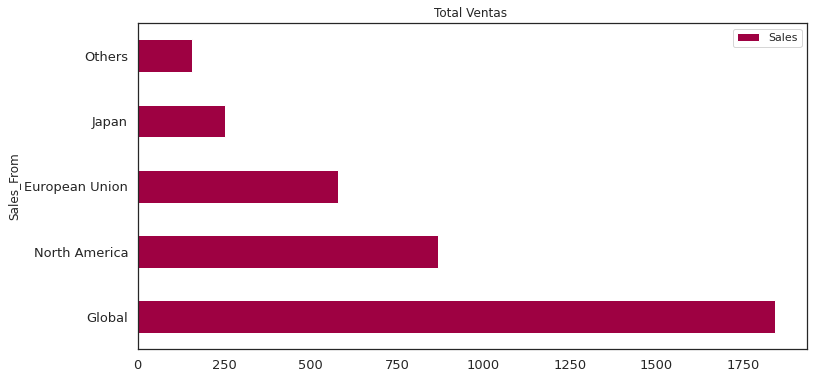

In [139]:
buy.plot(figsize=(12,6),x='Sales_From',y='Sales',kind="barh",fontsize=13,title='Total Ventas ',colormap='Spectral')


En este conjunto de datos, las ventas mundiales rondan los 1.900 dólares. Lo más interesante es que las ventas en Norteamérica representan el 50%. Por último, Japón y otros países son los que menos juegos venden. De acuerdo con esta observación, los americanos son aficionados a los videojuegos (juegos de interior), probablemente esta es también una de las razones por las que el gasto en salud es mayor .

Identificación de los juegos de lanzamiento

Juego viejo

In [150]:
release_game = df.dropna(subset=['year'])
release_game = release_game.sort_values(by='year')
release_game.iloc[0]

rank                       90
name                  Pac-Man
platform                 2600
year                     1982
genre                  Puzzle
publisher               Atari
northamerica_sales       7.28
eurpeanunion_sales       0.45
japan_sales               0.0
other_sales              0.08
global_sales             7.81
Name: 83, dtype: object

Último juego

In [151]:
release_game.iloc[-1]

rank                              222
name                          FIFA 17
platform                          PS4
year                             2016
genre                          Sports
publisher             Electronic Arts
northamerica_sales               0.28
eurpeanunion_sales               3.75
japan_sales                      0.06
other_sales                      0.69
global_sales                     4.77
Name: 196, dtype: object

Mayor número de juegos

In [152]:
release_game.groupby(['name'])['platform'].count().nlargest(5)

name
Grand Theft Auto V      4
Assassin's Creed        2
Assassin's Creed II     2
Assassin's Creed III    2
Batman: Arkham City     2
Name: platform, dtype: int64

Juegos más vendidos en 2008

In [155]:
year_2008 = df [df['year'] == 2008]
year_2008.head(10)

,rank,name,platform,year,genre,publisher,northamerica_sales,eurpeanunion_sales,japan_sales,other_sales,global_sales
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,NaN,12.88,3.79,NaN,35.82
35,40,Super Smash Bros. Brawl,Wii,2008,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04
46,52,Grand Theft Auto IV,X360,2008,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02
51,57,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
82,89,Pokémon Platinum Version,DS,2008,Role-Playing,Nintendo,NaN,NaN,2.69,0.55,7.84
92,99,Call of Duty: World at War,X360,2008,Shooter,Activision,NaN,1.90,0.00,0.69,7.37
107,119,Gears of War 2,X360,2008,Shooter,Microsoft Game Studios,4.15,1.92,0.06,0.64,6.76
131,145,Metal Gear Solid 4: Guns of the Patriots,PS3,2008,Action,Konami Digital Entertainment,2.63,1.74,0.83,0.83,6.03
134,149,LittleBigPlanet,PS3,2008,Platform,Sony Computer Entertainment,2.80,2.05,0.17,0.90,5.92
147,162,Monster Hunter Freedom Unite,PSP,2008,Role-Playing,Capcom,0.47,0.57,4.13,0.34,5.50


Juegos más vendidos en 2009

In [156]:
year_2009 = df [df['year'] == 2009]
year_2009.head(10)

,rank,name,platform,year,genre,publisher,northamerica_sales,eurpeanunion_sales,japan_sales,other_sales,global_sales
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,NaN,2.96,33.00
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,NaN,2.26,28.62
14,15,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
33,37,Call of Duty: Modern Warfare 2,X360,2009,Shooter,Activision,8.52,3.63,0.08,1.29,13.51
41,46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,NaN,2.77,3.96,0.77,11.90
50,56,Call of Duty: Modern Warfare 2,PS3,2009,Shooter,Activision,4.99,3.69,0.38,1.63,10.69
78,84,The Sims 3,PC,2009,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11
96,103,Just Dance,Wii,2009,Misc,Ubisoft,3.51,3.03,0.00,0.73,7.27
108,120,Uncharted 2: Among Thieves,PS3,2009,Action,Sony Computer Entertainment,3.27,2.25,0.21,1.00,6.73
121,134,Halo 3: ODST,X360,2009,Shooter,Microsoft Game Studios,4.34,1.35,0.06,0.61,6.36


Principales ventas mundiales de plataformas, géneros y publicaciones

In [211]:
total_publisher = df.groupby('publisher', as_index=False).agg({'northamerica_sales':'sum','japan_sales':'sum','other_sales':'sum','global_sales':'sum'})

total_publisher.sort_values('global_sales', ascending=False).iloc[:10]

,publisher,northamerica_sales,japan_sales,other_sales,global_sales
11,Nintendo,469.26,199.82,61.01,1028.92
1,Activision,94.29,3.91,25.23,217.44
13,Sony Computer Entertainment,45.60,16.07,10.95,102.76
17,Take-Two Interactive,45.71,2.63,15.16,102.17
10,Microsoft Game Studios,83.78,1.00,9.25,85.72
6,Electronic Arts,17.55,0.95,13.36,80.21
18,Ubisoft,32.00,0.64,6.92,60.07
3,Bethesda Softworks,13.44,0.68,3.44,27.32
4,Capcom,4.90,12.95,1.11,21.78
12,Sega,8.69,1.26,1.68,19.23


Los juegos más vendidos en todo el mundo

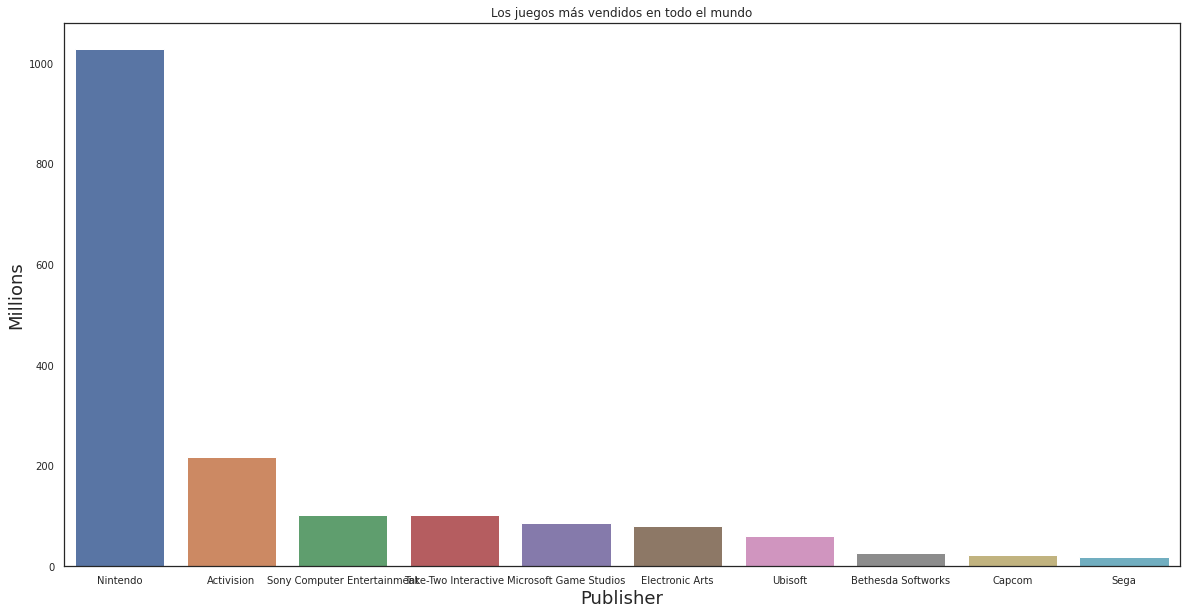

In [212]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'publisher', y = 'global_sales',  data = total_publisher.sort_values('global_sales', ascending=False).iloc[:10])
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Publisher', fontsize=18)
plt.ylabel('Millions', fontsize=18)
plt.title('Los juegos más vendidos en todo el mundo')
plt.show()

In [220]:
genres_sales = df.groupby(['genre', 'platform'], as_index=False).agg({'global_sales': 'sum'}).sort_values('global_sales', ascending=False)

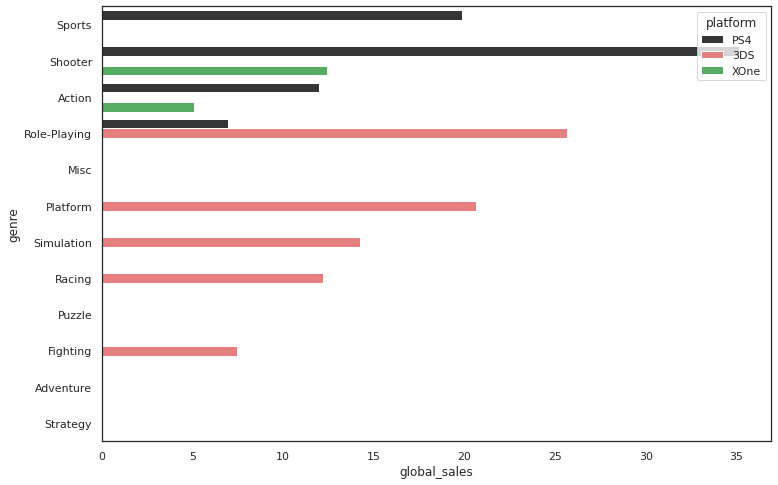

In [221]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=genres_sales.genre,
                 x=genres_sales.global_sales,
                 orient='h',
                 color='#6925c2',
                 palette=['#363636', '#f76f6f', '#49ba5a'],
                 hue=genres_sales.platform,
                 hue_order=['PS4', '3DS', 'XOne']
                 )

Es interesante observar que la plataforma 3DS destaca en términos de preferencia de género. Por ejemplo, el género de los shooters no es nada popular allí, mientras que el de los juegos de rol ocupa el primer lugar por un amplio margen. El género deportivo (4º en la clasificación general) es el más popular entre los usuarios de PS4.



Se identificaron las tres plataformas más relevantes en la actualidad y en cuanto a perspectivas para los próximos años (PS3, XOne, 3DS). Se determinó la correlación entre las evaluaciones de los críticos y las de los usuarios. En general, las puntuaciones de los críticos tienen una mala correlación con las ventas, mientras que las puntuaciones de los usuarios y las ventas tienen una correlación muy débil (casi nula).

Se encontraron los géneros de juego más populares en los últimos 5 años (Acción, Shooter y Role). Se obtuvo un desglose de la popularidad de los géneros por plataforma (destacan las preferencias de los usuarios de la plataforma 3DS: por ejemplo, estos usuarios no están nada interesados en el género de los juegos de disparos, que es más que popular en otras plataformas).

También se observó que la mayor parte de los ingresos totales los genera un pequeño número de juegos de éxito. cuyas ventas son decenas de veces superiores a la media mundial de ventas de juegos.

**Paso 4: Retrato de usuario de cada región**